# Beneath the Surface: Uncovering Water Scarcity Through Data Analytics

### Contemporary Relevance of the Project
This project is highly relevant in the present context as it leverages data analytics to identify long-term scarcity patterns, groundwater stress, and demand–supply imbalances, enabling policymakers, urban planners, and environmental agencies to design targeted, sustainable water management strategies.


### Dataset- water_scarcity_GW_depletion_EDA_dataset.csv(~5K rows)

### Tools - Python, pandas, matplotlib, seaborn,Jupyter


### Abstract

Water scarcity and groundwater depletion are growing challenges driven by rising demand, climate variability, and unsustainable groundwater extraction. This project uses exploratory data analysis to examine regional and temporal patterns in water scarcity by analyzing rainfall, groundwater levels, water demand, supply, extraction, and recharge data. The insights aim to support sustainable water management and data-driven policy decisions.

### Introduction
Groundwater is a vital freshwater source, yet increasing population pressure and inefficient water management have led to declining groundwater levels in many regions. Despite adequate rainfall in some areas, water scarcity persists due to demand–supply imbalance and over-extraction. This project applies data analytics to uncover key trends and relationships influencing water stress and groundwater sustainability.



### Problem Statement
 Many regions are experiencing persistent water scarcity despite natural availability of rainfall and surface water resources. The core problem lies in the imbalance between rising water demand and limited or inefficient water supply, compounded by unsustainable groundwater extraction that exceeds natural recharge rates
  
### This project seeks to address the following key questions:
* How has water scarcity evolved over time across different regions?
* What is the relationship between groundwater levels, extraction, recharge, and scarcity?
* To what extent does population growth influence water demand and scarcity?
* Are current groundwater usage patterns sustainable in the long term?

By answering these questions through data analytics, the project aims to highlight the underlying drivers of water scarcity and identify areas requiring urgent intervention.

### Data Description
The dataset used in this project represents region-wise and year-wise water resource indicators, capturing both natural and human-driven factors influencing water availability. Each record corresponds to a specific region, district, and year, with the following key variables:
* Region / State / District: Geographic identifiers for spatial analysis.
* Year: Temporal dimension to analyze trends over time.
* Rainfall (mm): Annual rainfall received in the region.
* Groundwater Level (m): Average depth of groundwater, indicating availability.
* Water Extraction (MCM): Volume of groundwater extracted.
* Water Recharge (MCM): Volume of groundwater naturally or artificially replenished.
* Population: Total population of the region.
* Water Demand (MLD): Estimated daily water requirement.
* Water Supply (MLD): Actual daily water supplied.
* Scarcity Index: Composite indicator representing overall water stress.
### Additional engineered features such as water deficit, groundwater stress, and extraction–recharge ratio were derived to enhance analytical depth and enable sustainability assessment.

### Importing Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set(style="whitegrid")

In [35]:
import warnings
warnings.filterwarnings("ignore")


### Load Dataset

In [36]:
df = pd.read_csv(r"C:\Users\mkaur\Downloads\water_scarcity_GW_depletion_EDA_dataset.csv")

# Check dataset Shape
print("Dataset Shape" ,df.shape)

# Display the first 5 rows of dataset
df.head(5)

Dataset Shape (5000, 12)


,region,state,district,year,rainfall_mm,groundwater_level_m,water_extraction_mcm,water_recharge_mcm,population,water_demand_mld,water_supply_mld,scarcity_index
0,East,West Bengal,District_7,2023,1039.08,37.14,233.61,251.13,3112042,180.48,176.04,0.0245
1,West,Gujarat,District_63,2007,861.29,18.02,101.43,79.36,3225548,692.15,659.72,0.0468
2,Central,Madhya Pradesh,District_27,2021,737.35,10.80,148.23,136.25,1322371,58.38,49.03,0.1576
3,Central,Chhattisgarh,District_23,2018,752.95,21.19,73.53,25.63,1515942,185.09,156.20,0.1552
4,East,Jharkhand,District_9,2000,918.91,30.44,73.47,54.87,2601644,315.03,344.04,-0.0918


In [37]:
# Basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                5000 non-null   object 
 1   state                 5000 non-null   object 
 2   district              5000 non-null   object 
 3   year                  5000 non-null   int64  
 4   rainfall_mm           5000 non-null   float64
 5   groundwater_level_m   5000 non-null   float64
 6   water_extraction_mcm  5000 non-null   float64
 7   water_recharge_mcm    5000 non-null   float64
 8   population            5000 non-null   int64  
 9   water_demand_mld      5000 non-null   float64
 10  water_supply_mld      5000 non-null   float64
 11  scarcity_index        5000 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 468.9+ KB


In [38]:
# Summary statistics (for numeric columns)
df.describe()

,year,rainfall_mm,groundwater_level_m,water_extraction_mcm,water_recharge_mcm,population,water_demand_mld,water_supply_mld,scarcity_index
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2011.484400,894.606746,26.002026,203.806880,193.379424,1.742288e+06,224.763436,217.431722,0.095446
std,6.927608,281.053996,13.889510,82.391962,85.602055,1.003469e+06,166.288739,167.510942,0.667883
min,2000.000000,0.000000,2.010000,60.010000,13.530000,1.518400e+04,0.850000,-38.000000,-4.547700
25%,2005.000000,703.215000,13.950000,134.220000,122.137500,8.525402e+05,88.542500,81.415000,-0.049025
50%,2011.000000,895.960000,25.865000,204.405000,193.365000,1.749638e+06,187.815000,178.505000,0.031400
75%,2018.000000,1084.940000,38.082500,273.612500,263.640000,2.616805e+06,332.532500,326.275000,0.132475
max,2023.000000,1851.480000,49.990000,349.870000,377.900000,3.499875e+06,746.650000,767.640000,14.314500


In [39]:
# Check missing values
df.isnull().sum()


region                  0
state                   0
district                0
year                    0
rainfall_mm             0
groundwater_level_m     0
water_extraction_mcm    0
water_recharge_mcm      0
population              0
water_demand_mld        0
water_supply_mld        0
scarcity_index          0
dtype: int64

### Feature Engineering/ Derived Columns

In [40]:
df["water_deficit_mld"] = df["water_demand_mld"] - df["water_supply_mld"]
df["extraction_recharge_ratio"] = df["water_extraction_mcm"] / df["water_recharge_mcm"]
df["per_capita_water_demand"] = df["water_demand_mld"] / df["population"]
df["per_capita_water_supply"] = df["water_supply_mld"] / df["population"]
df["groundwater_stress"] = df["water_extraction_mcm"] - df["water_recharge_mcm"]


# Exploratory Data Analysis(EDA)

### Long-Term Trend in Average Groundwater Levels

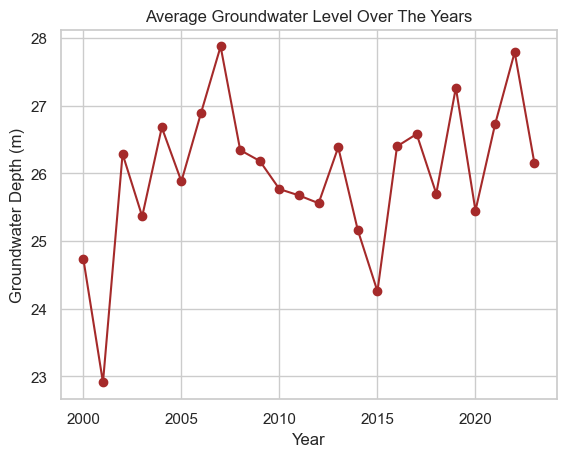

In [41]:
gw_trend = df.groupby("year")["groundwater_level_m"].mean()

plt.plot(gw_trend.index, gw_trend.values, marker="o", color="brown")
plt.title("Average Groundwater Level Over The Years")
plt.ylabel("Groundwater Depth (m)")
plt.xlabel("Year")
plt.grid(True)
plt.show()


### Insight
* The chart shows a gradual increase in groundwater depth over the years, indicating a declining groundwater table and sustained pressure on underground water resources
* (Groundwater depth increasing = water level going deeper = depletion)
### Recommendation
* Immediate focus should be placed on reducing groundwater extraction and enhancing recharge mechanisms, such as rainwater harvesting and aquifer recharge projects, to reverse the declining trend.

### Scatter Plot – Impact of Rainfall on Groundwater Levels

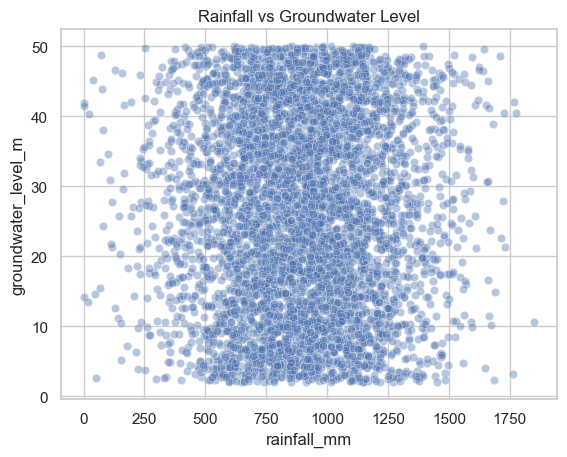

In [42]:
sns.scatterplot(data=df, x="rainfall_mm", y="groundwater_level_m", alpha=0.4)
plt.title("Rainfall vs Groundwater Level")
plt.show()


### Insight
* The scatter plot shows a weak and widely dispersed relationship between rainfall and groundwater levels, indicating that higher rainfall does not consistently translate into improved groundwater conditions.
### Recommendation
* Groundwater sustainability efforts should focus on improving recharge efficiency and controlling extraction, as rainfall alone is insufficient to restore groundwater levels.

###  Distribution Plot – Scarcity Index

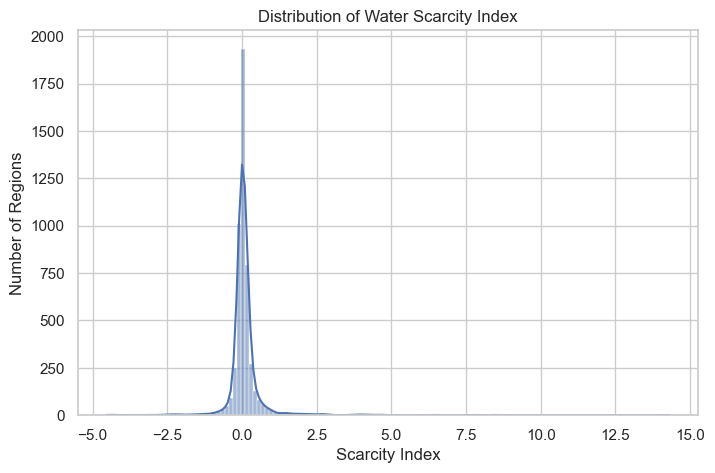

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df["scarcity_index"], kde=True)
plt.title("Distribution of Water Scarcity Index")
plt.xlabel("Scarcity Index")
plt.ylabel("Number of Regions")
plt.show()



### Insight:
* Most regions fall in low–moderate scarcity, but a small number experience extremely high water stress.
### Recommendation:
* High-scarcity outliers should be prioritized for immediate water conservation and policy intervention.

### Distribution Plot – Rainfall

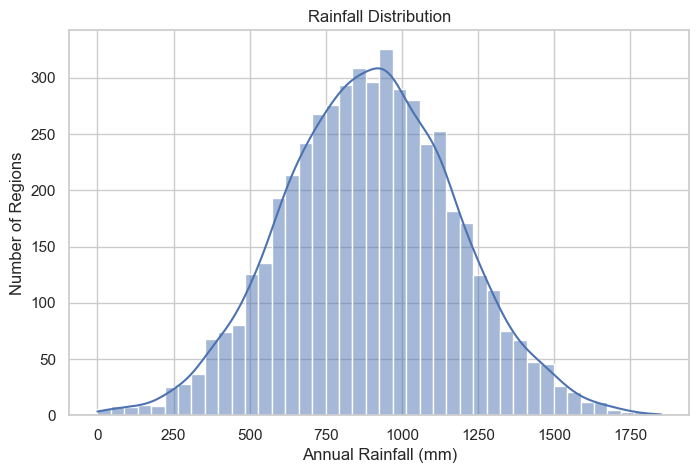

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df["rainfall_mm"], kde=True)
plt.title("Rainfall Distribution")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Number of Regions")
plt.show()



### Insight:
* Rainfall is unevenly distributed, with most areas receiving moderate rainfall and few extreme values.
### Recommendation:
* Regions with moderate rainfall should focus on storage and harvesting rather than relying on groundwater.

### Box Plot – Scarcity by Region

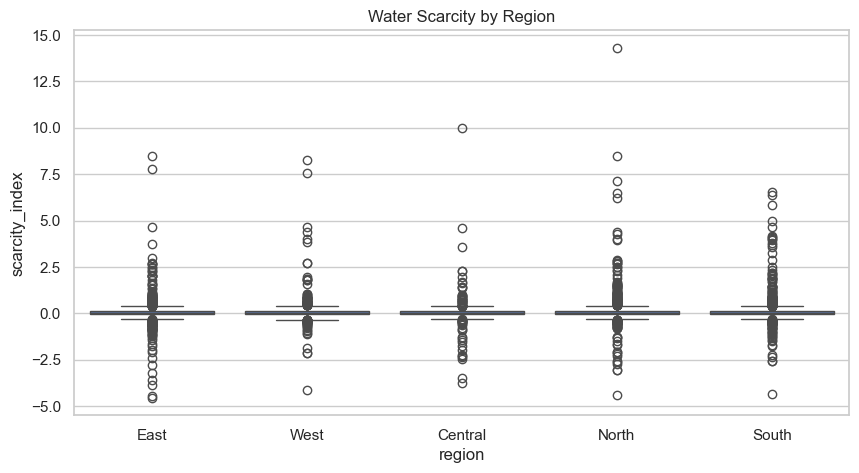

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="region", y="scarcity_index")
plt.title("Water Scarcity by Region")
plt.show()


### Insight: 
* Certain regions show higher median scarcity and greater variability, indicating unequal water availability.
### Recommendation:
* Implement region-specific water management strategies instead of uniform national policies.

### Box Plot – Groundwater Level by Region

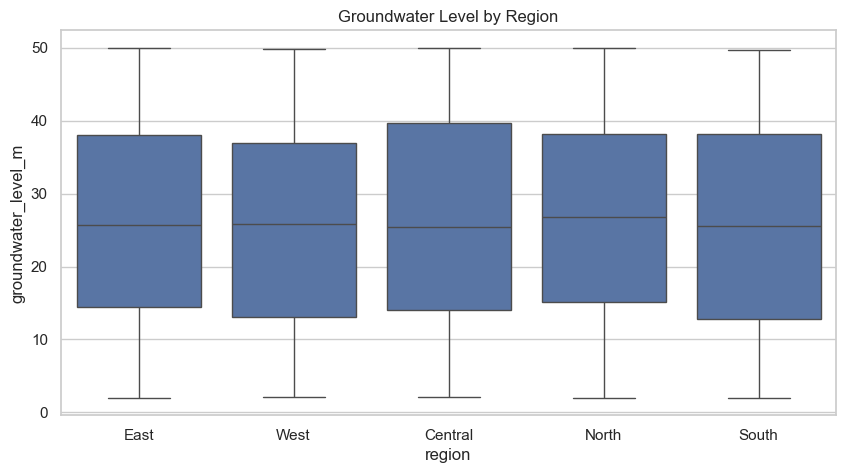

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="region", y="groundwater_level_m")
plt.title("Groundwater Level by Region")
plt.show()


### Insight:
* Some regions consistently exhibit lower groundwater levels, reflecting long-term depletion.
### Recommendation:
*  Regulate groundwater extraction and promote artificial recharge in vulnerable regions.

###  Line Plot – Scarcity Trend Over Years

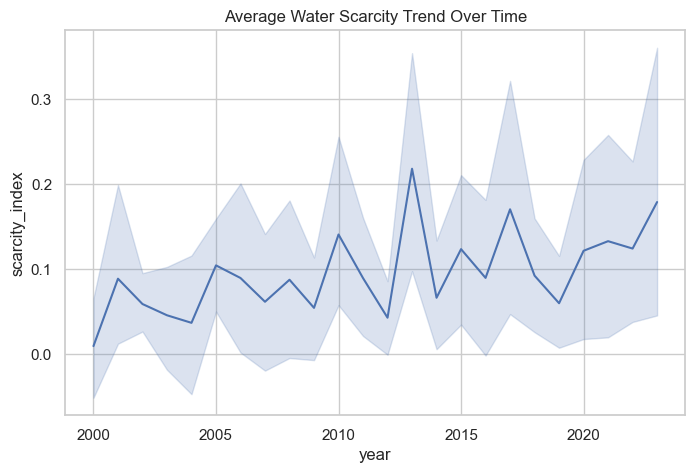

In [47]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x="year",
    y="scarcity_index",
    estimator="mean"
)
plt.title("Average Water Scarcity Trend Over Time")
plt.show()


### Insight:
*  Average water scarcity shows an increasing trend over the years, indicating growing stress.
### Recommendation:
*  Shift from reactive drought response to proactive long-term water planning.

### Line Plot – Groundwater Level Trend

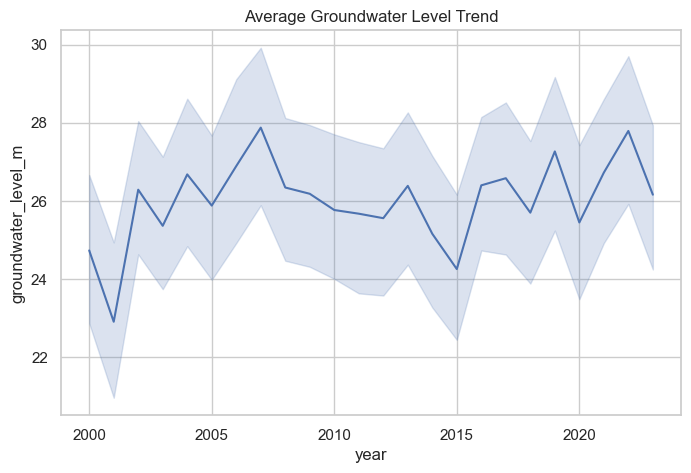

In [48]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x="year",
    y="groundwater_level_m",
    estimator="mean"
)
plt.title("Average Groundwater Level Trend")
plt.show()


### Insight:
*  Groundwater levels fluctuate but do not show sustained recovery over time.
### Recommendation:
*  Strengthen watershed management and recharge infrastructure to restore groundwater balance.

###  Scatter Plot – Rainfall vs Scarcity

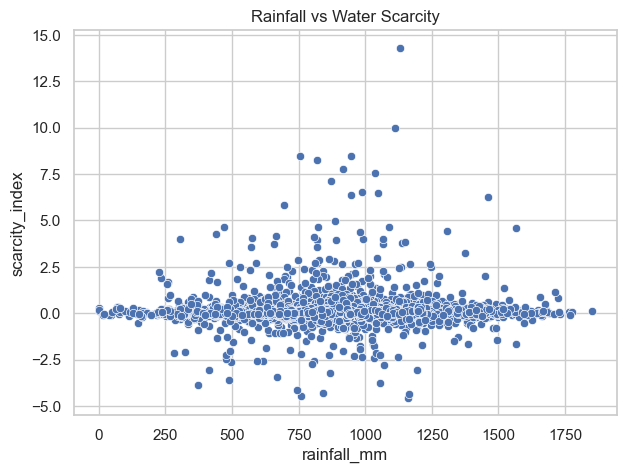

In [49]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="rainfall_mm", y="scarcity_index")
plt.title("Rainfall vs Water Scarcity")
plt.show()


### Insight:
* Higher rainfall does not always correspond to lower water scarcity.
### Recommendation:
*  Improve water storage, distribution efficiency, and governance beyond rainfall dependency.

###  Scatter Plot – Groundwater Level vs Scarcity

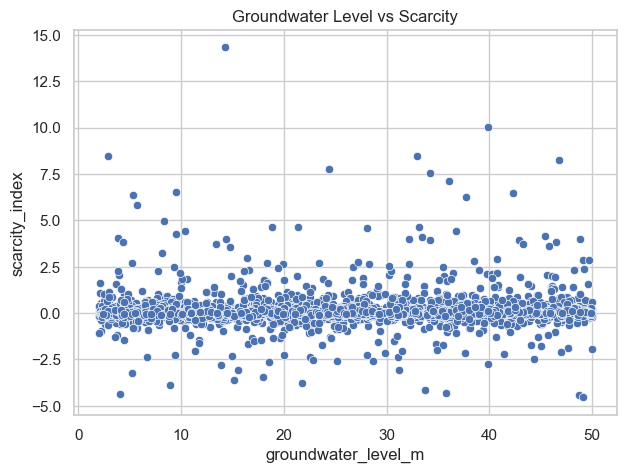

In [50]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="groundwater_level_m", y="scarcity_index")
plt.title("Groundwater Level vs Scarcity")
plt.show()


### Insight:
*  Lower groundwater levels are generally associated with higher water scarcity.
### Recommendation:
*  Introduce groundwater-level–linked extraction limits to prevent further depletion.

### Scatter Plot – Extraction–Recharge Ratio vs Scarcity

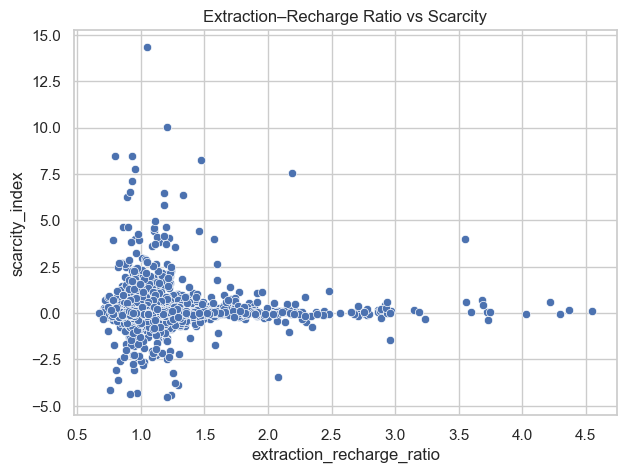

In [51]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="extraction_recharge_ratio",
    y="scarcity_index"
)
plt.title("Extraction–Recharge Ratio vs Scarcity")
plt.show()


### Insight:
*  Regions with extraction exceeding recharge experience significantly higher scarcity.
### Recommendation:
*  Enforce strict groundwater extraction controls in over-exploited zones.

###  KDE Plot – Water Deficit

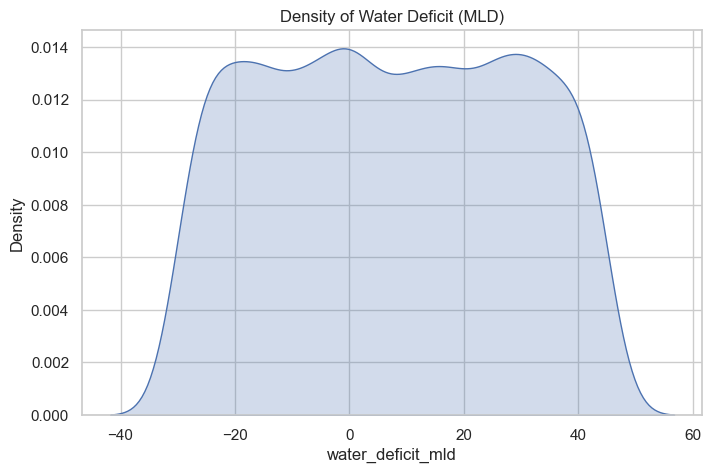

In [52]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["water_deficit_mld"], fill=True)
plt.title("Density of Water Deficit (MLD)")
plt.show()


### Insight:
*  A large portion of regions consistently face water demand–supply gaps.
### Recommendation:
*  Reduce demand through conservation and improve supply via reuse and efficiency measures.

### Scatter Plot -Impact of Population Growth on Water Demand and Scarcity

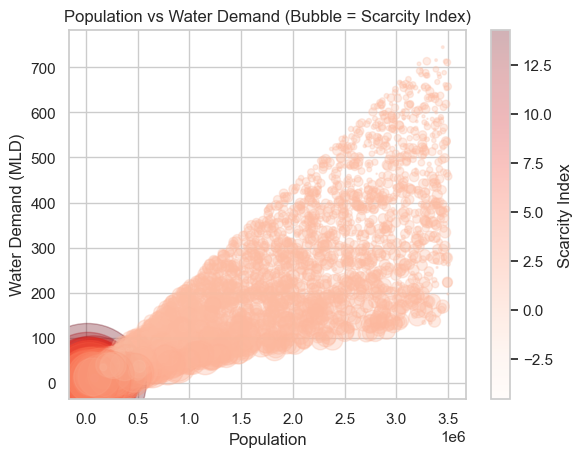

In [53]:
plt.scatter(
    df["population"],
    df["water_demand_mld"],
    s=df["scarcity_index"]*500,
    alpha=0.3,
    c=df["scarcity_index"],
    cmap="Reds"
)
plt.title("Population vs Water Demand (Bubble = Scarcity Index)")
plt.xlabel("Population")
plt.ylabel("Water Demand (MLD)")
plt.colorbar(label="Scarcity Index")
plt.show()


### Insight
* The chart shows that water demand increases with population size, and regions with larger populations often exhibit higher water scarcity, as indicated by larger and darker bubbles.
### Recommendation 
* Urban and high-population regions should prioritize demand-side water management, including efficiency measures, reuse systems, and population-sensitive water planning.

### Heatmap – Correlation Matrix

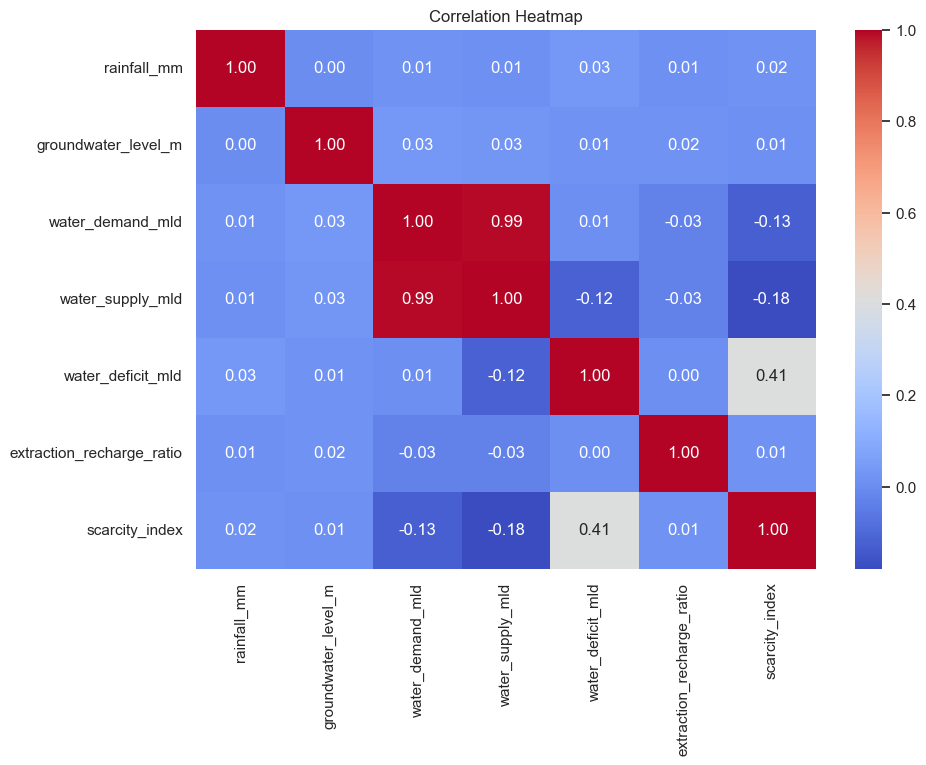

In [54]:
plt.figure(figsize=(10,7))
corr = df[
    ["rainfall_mm", "groundwater_level_m", "water_demand_mld",
     "water_supply_mld", "water_deficit_mld",
     "extraction_recharge_ratio", "scarcity_index"]
].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Insight:
*  Water scarcity is strongly influenced by demand, supply imbalance, and groundwater stress rather than rainfall alone.
### Recommendation:
*  Adopt multi-factor data-driven planning instead of rainfall-based decision-making.

###  Heatmap – Scarcity by Region & Year

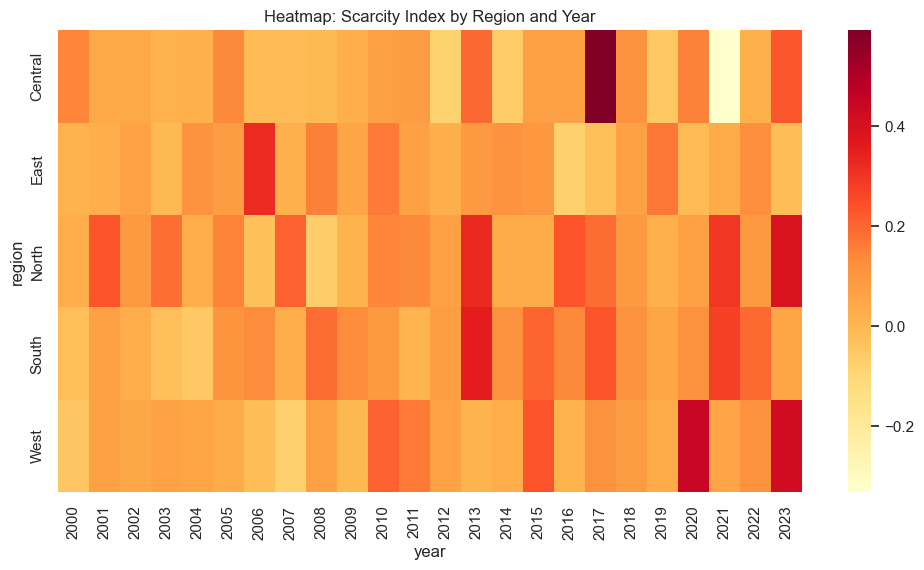

In [55]:
pivot_region_year = df.pivot_table(
    values="scarcity_index",
    index="region",
    columns="year",
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_region_year, cmap="YlOrRd")
plt.title("Heatmap: Scarcity Index by Region and Year")
plt.show()


### Insight
* Some regions remain persistently water-stressed year after year, highlighting long-term imbalance between water demand and availability.
### Recommendation
* Policymakers should classify persistently high-scarcity regions as priority intervention zones and allocate targeted funding and governance reforms accordingly.

### Heatmap – Water Deficit by Region & Year

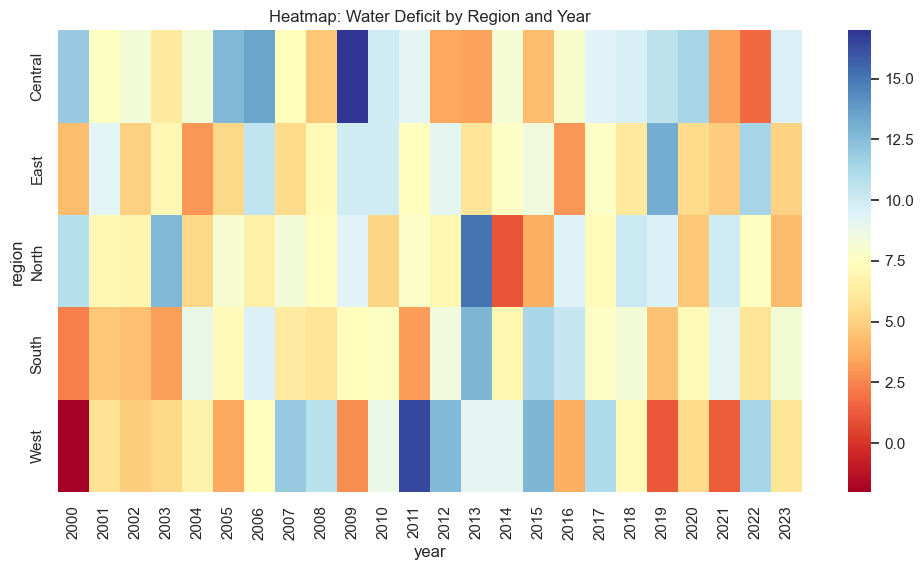

In [56]:
pivot_deficit = df.pivot_table(
    values="water_deficit_mld",
    index="region",
    columns="year",
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_deficit, cmap="RdYlBu")
plt.title("Heatmap: Water Deficit by Region and Year")
plt.show()


### Insight:
* Several regions show persistent water stress across multiple years.
### Recommendation:
*  Classify these regions as chronic water-stress zones and prioritize funding.

###  Heatmap – Groundwater Stress by Region

In [57]:
df["groundwater_stress"] = (
    df["water_extraction_mcm"] - df["water_recharge_mcm"]
)


In [58]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


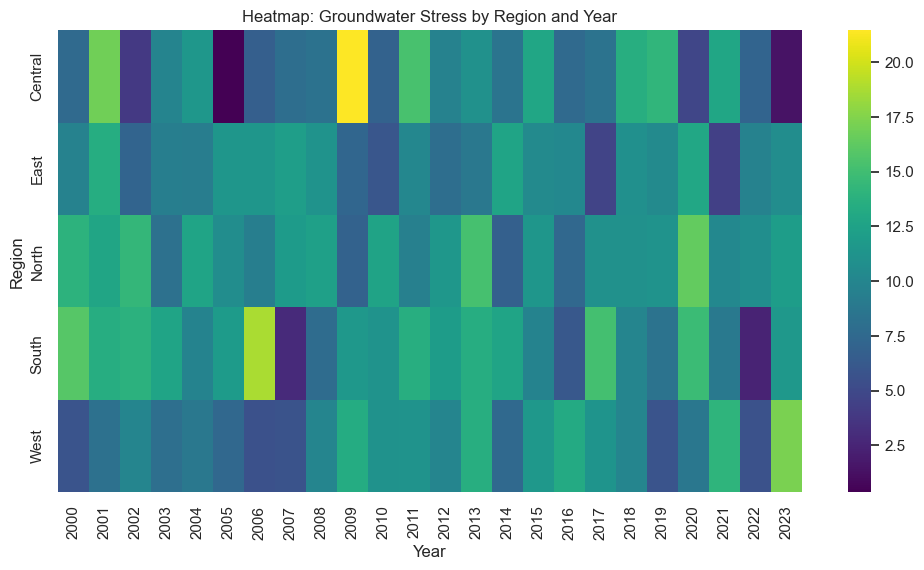

In [59]:
pivot_stress = df.pivot_table(
    values="groundwater_stress",
    index="region",
    columns="year",
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_stress, cmap="viridis")
plt.title("Heatmap: Groundwater Stress by Region and Year")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()


### Insight
* Groundwater stress persists over time in specific regions, revealing structural over-extraction issues rather than temporary fluctuations.
### Recommendation
* Policymakers should introduce region-specific groundwater budgeting and recharge mandates in high-stress zones to prevent irreversible aquifer depletion.


###  Pair Plot (Seaborn)

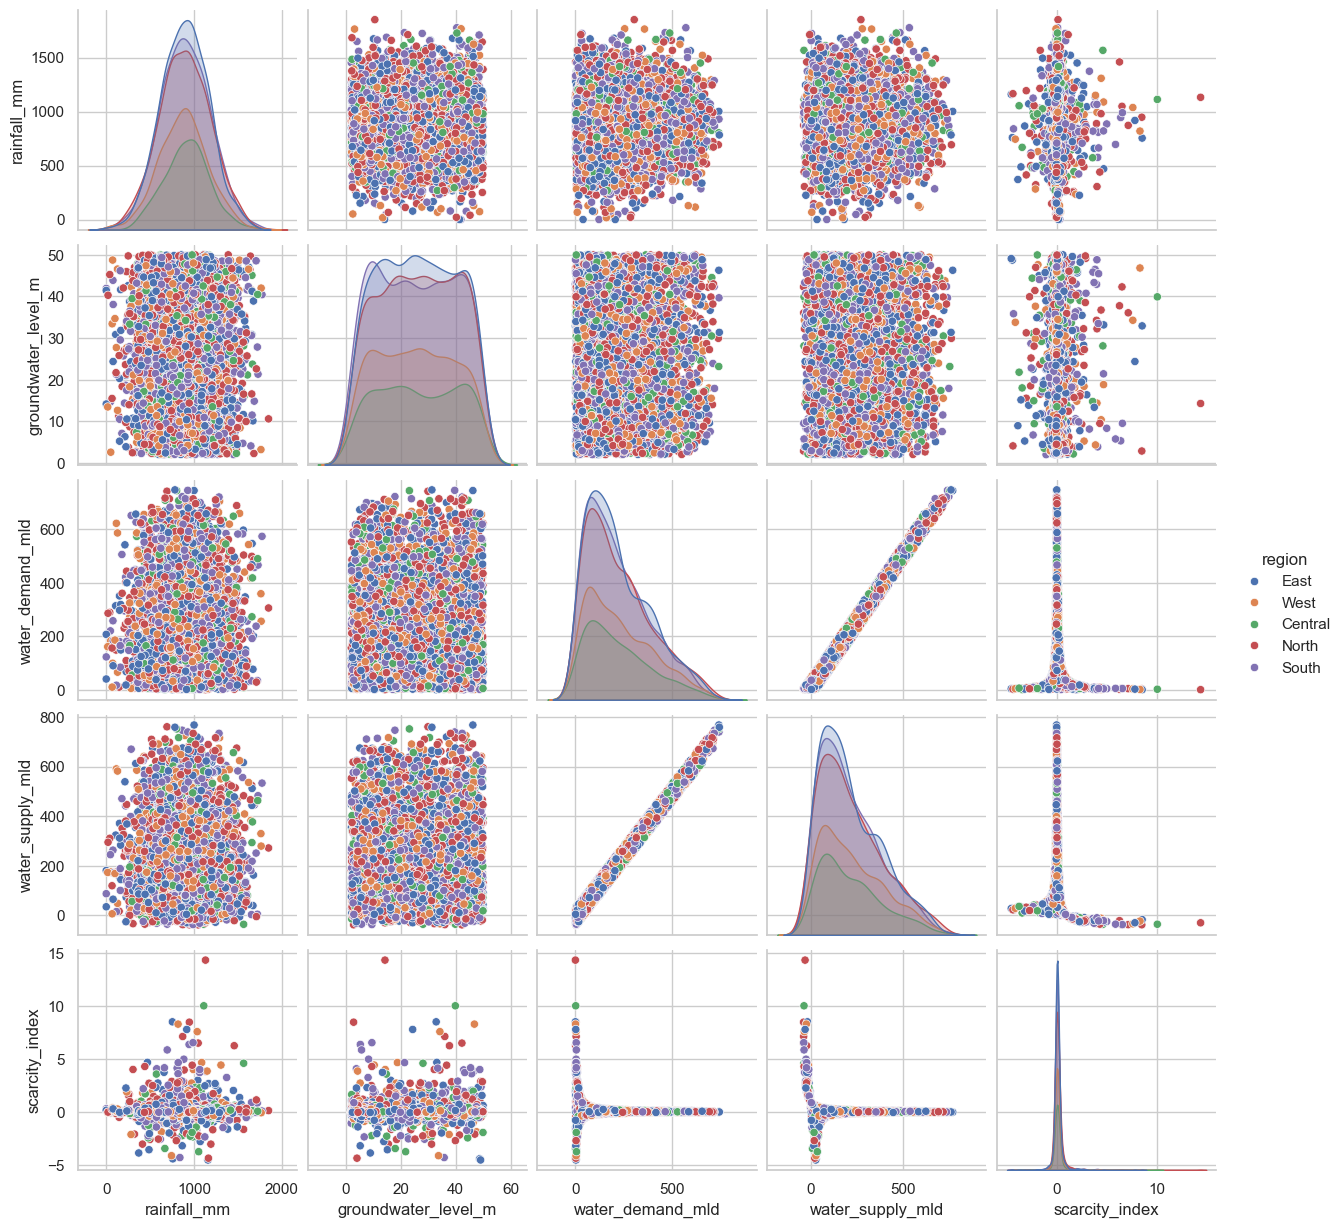

In [61]:
sns.pairplot(
    df,
    vars=["rainfall_mm", "groundwater_level_m",
          "water_demand_mld", "water_supply_mld",
          "scarcity_index"],
    hue="region"
)
plt.show()


### Insight:
*  Water scarcity emerges from the combined effect of demand, supply, and groundwater stress.
### Recommendation:
*  Use integrated water management models considering multiple interrelated variables.

### Regplot -Groundwater Extraction vs Natural Recharge Relationship”

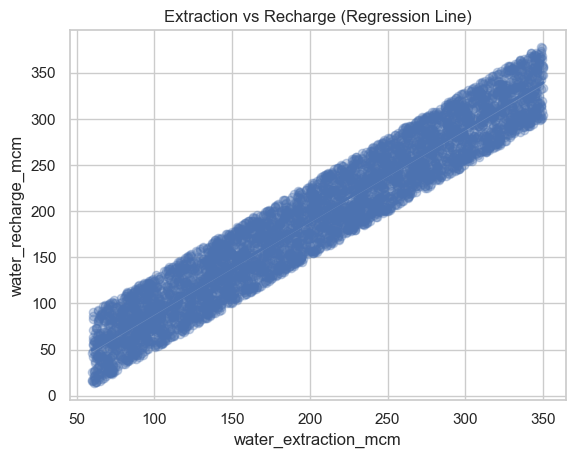

In [62]:
sns.regplot(data=df, x="water_extraction_mcm", y="water_recharge_mcm", scatter_kws={'alpha':0.3})
plt.title("Extraction vs Recharge (Regression Line)")
plt.show()


### Insight
* The regression plot indicates that groundwater extraction generally exceeds recharge in many observations, with wide dispersion around the trend line, suggesting unsustainable and uneven groundwater usage across regions.
### Recommendation 
* Regions where extraction consistently outpaces recharge should implement strict extraction limits and mandatory recharge interventions to restore long-term groundwater balance.

###  Violin Plot – Scarcity Index by Region

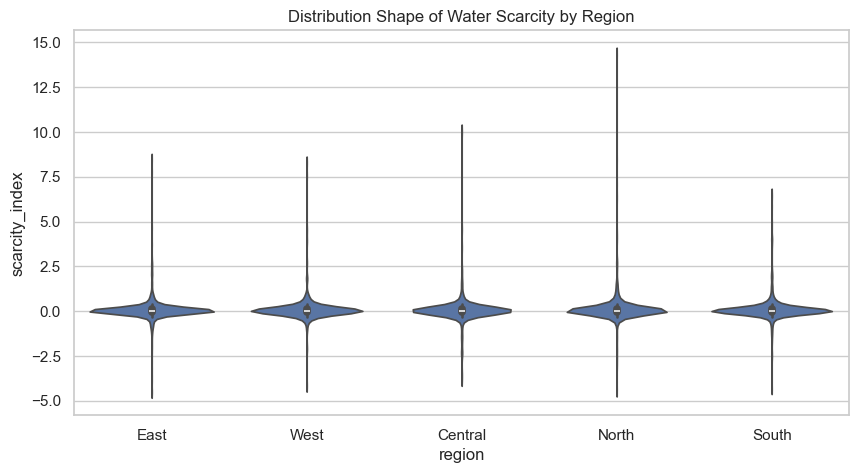

In [63]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="region", y="scarcity_index")
plt.title("Distribution Shape of Water Scarcity by Region")
plt.show()


### Insight:
* Some regions show wide distribution tails, indicating extreme scarcity pockets.
### Recommendation:
* Identify micro-regions within high-variance areas for targeted action.

### Violin Plot – Water Deficit by Region

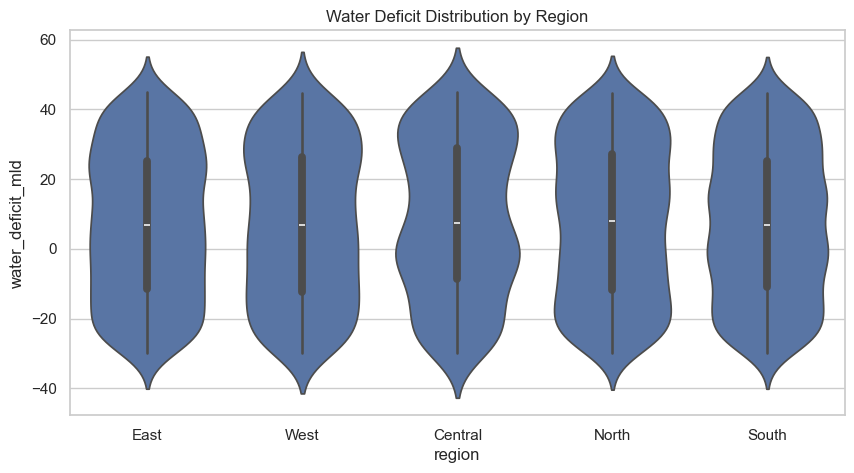

In [64]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="region", y="water_deficit_mld")
plt.title("Water Deficit Distribution by Region")
plt.show()


### Insight:
* Certain regions experience consistently high deficits with limited recovery.
### Recommendation:
* Prioritize supply augmentation and reuse systems in these regions.

### Scatter + Trend – Water Demand vs Supply

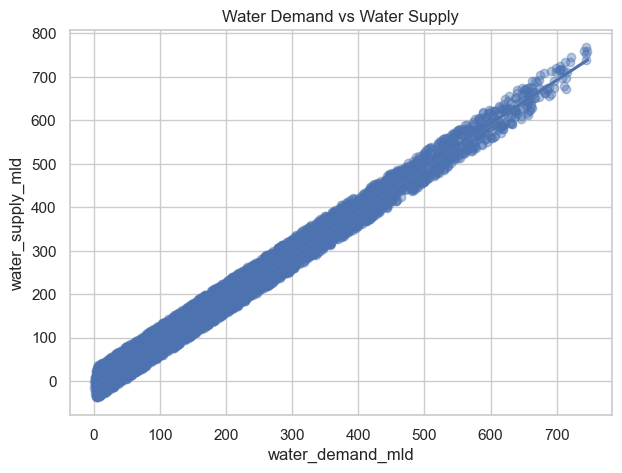

In [65]:
plt.figure(figsize=(7,5))
sns.regplot(data=df, x="water_demand_mld", y="water_supply_mld", scatter_kws={'alpha':0.4})
plt.title("Water Demand vs Water Supply")
plt.show()


### Insight:
* Supply does not scale proportionally with increasing demand.
### Recommendation:
* Plan infrastructure expansion aligned with future demand projections.

### Scatter – Groundwater Stress vs Scarcity

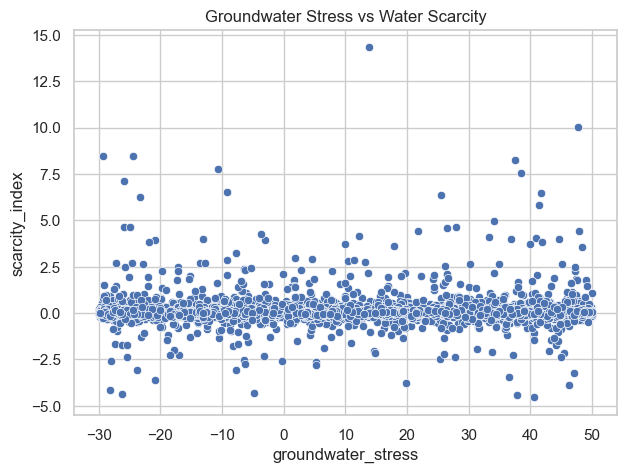

In [66]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="groundwater_stress", y="scarcity_index")
plt.title("Groundwater Stress vs Water Scarcity")
plt.show()


### Insight:
* Higher groundwater stress is strongly associated with higher scarcity.
### Recommendation:
* Introduce groundwater stress thresholds for regulatory intervention.

### Box Plot – Extraction–Recharge Ratio by Region

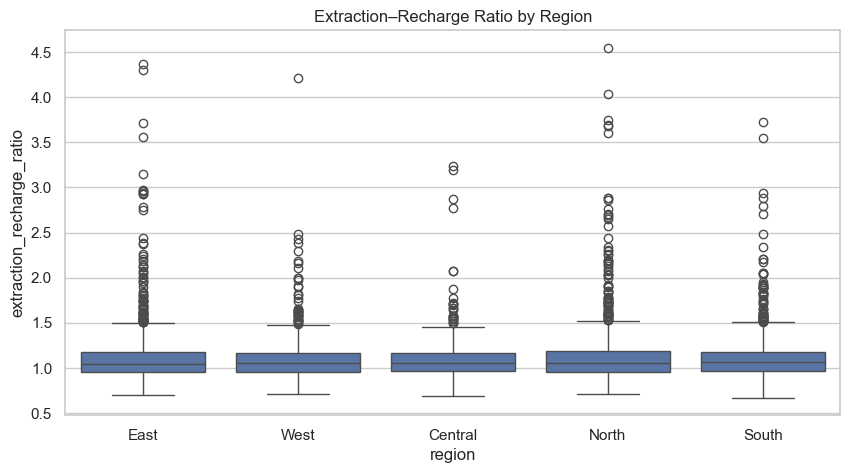

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="region", y="extraction_recharge_ratio")
plt.title("Extraction–Recharge Ratio by Region")
plt.show()


### Insight:
* Several regions exceed sustainable extraction limits.
### Recommendation:
*  Enforce region-wise groundwater extraction caps.

###  Histogram – Groundwater Stress

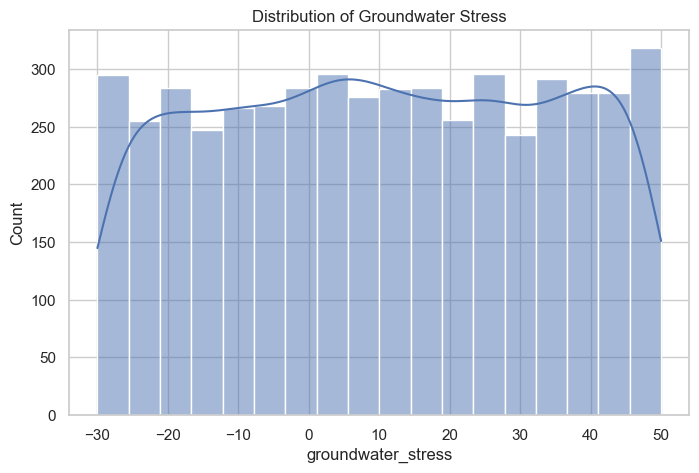

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(df["groundwater_stress"], kde=True)
plt.title("Distribution of Groundwater Stress")
plt.show()


### Insight:
*  Many regions show positive stress, indicating net groundwater loss.
### Recommendation:
* Expand recharge programs where stress consistently remains positive.

###  Line Plot – Average Water Deficit Over Time

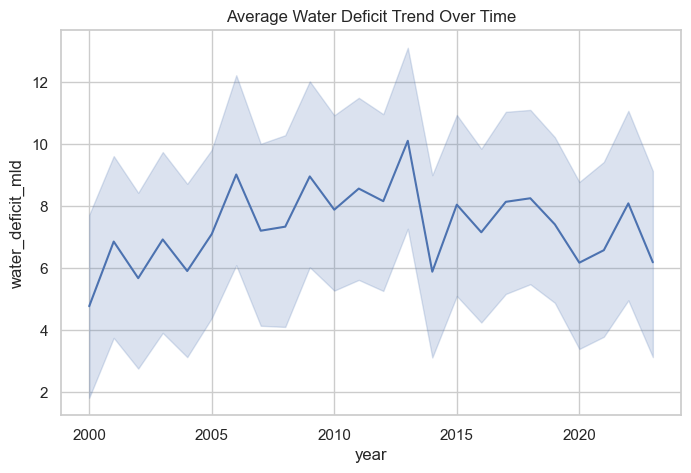

In [69]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="year", y="water_deficit_mld", estimator="mean")
plt.title("Average Water Deficit Trend Over Time")
plt.show()


### Insight:
* Water deficit has increased steadily over the years.
### Recommendation:
* Shift focus toward long-term water demand reduction strategies.

### Scatter – Rainfall vs Extraction–Recharge Ratio

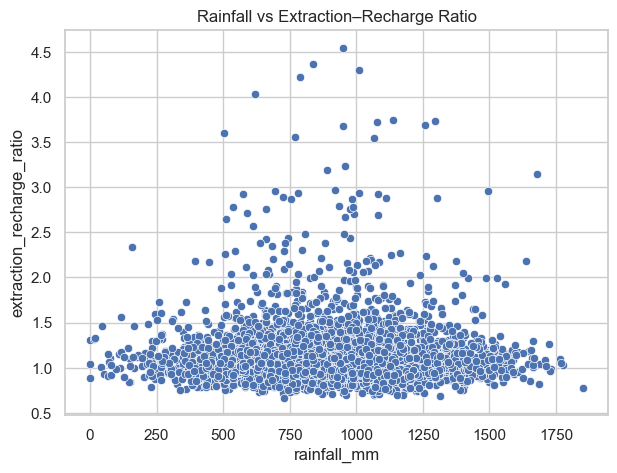

In [70]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="rainfall_mm", y="extraction_recharge_ratio")
plt.title("Rainfall vs Extraction–Recharge Ratio")
plt.show()


### Insight:
*  Even high-rainfall regions may over-extract groundwater.
### Recommendation:
*  Improve groundwater governance regardless of rainfall availability.

### Heatmap – Average Metrics by Region

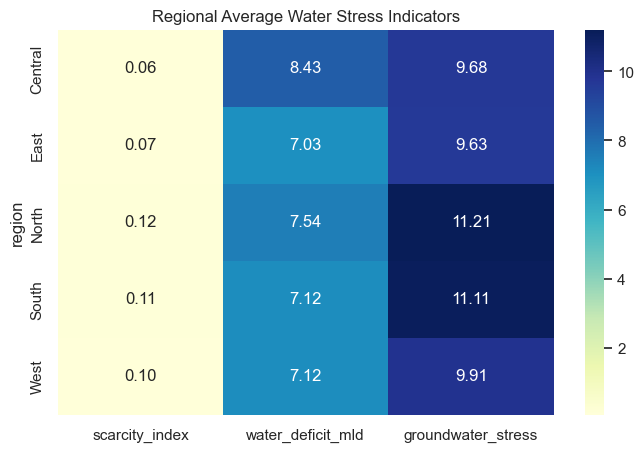

In [71]:
pivot_metrics = df.groupby("region")[[
    "scarcity_index",
    "water_deficit_mld",
    "groundwater_stress"
]].mean()

plt.figure(figsize=(8,5))
sns.heatmap(pivot_metrics, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Regional Average Water Stress Indicators")
plt.show()


### Insight:
*  Some regions score poorly across multiple stress indicators.
### Recommendation:
*  Design integrated regional water resilience programs.

### Strip Plot – Scarcity Index by Region

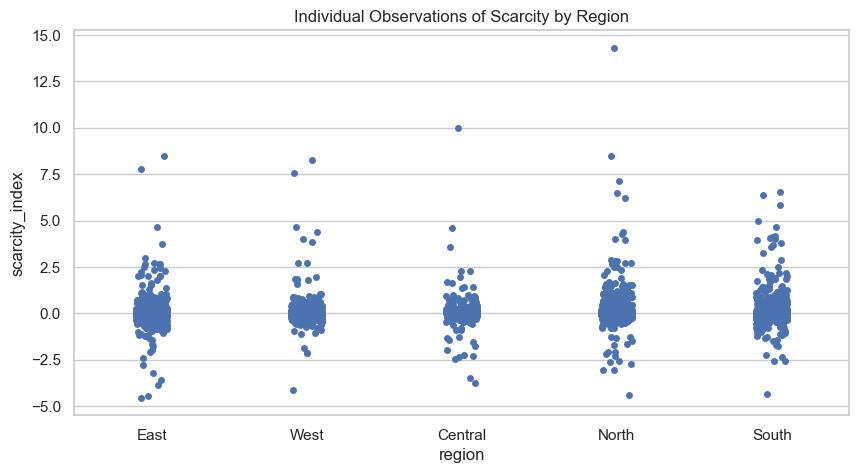

In [72]:
plt.figure(figsize=(10,5))
sns.stripplot(data=df, x="region", y="scarcity_index", jitter=True)
plt.title("Individual Observations of Scarcity by Region")
plt.show()


### Insight:
* Individual districts within the same region experience vastly different scarcity levels.
### Recommendation:
*  Use district-level rather than region-level water planning.

### Correlation Heatmap of Key Water Stress Indicators(Most Important)
This single chart summarizes the entire story of your project in one view

In [73]:
# Creating some derived columns
df["water_deficit_mld"] = df["water_demand_mld"] - df["water_supply_mld"]

df["extraction_recharge_ratio"] = (
    df["water_extraction_mcm"] / df["water_recharge_mcm"]
)

df["groundwater_stress"] = (
    df["water_extraction_mcm"] - df["water_recharge_mcm"]
)


In [74]:
# Cleaning
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


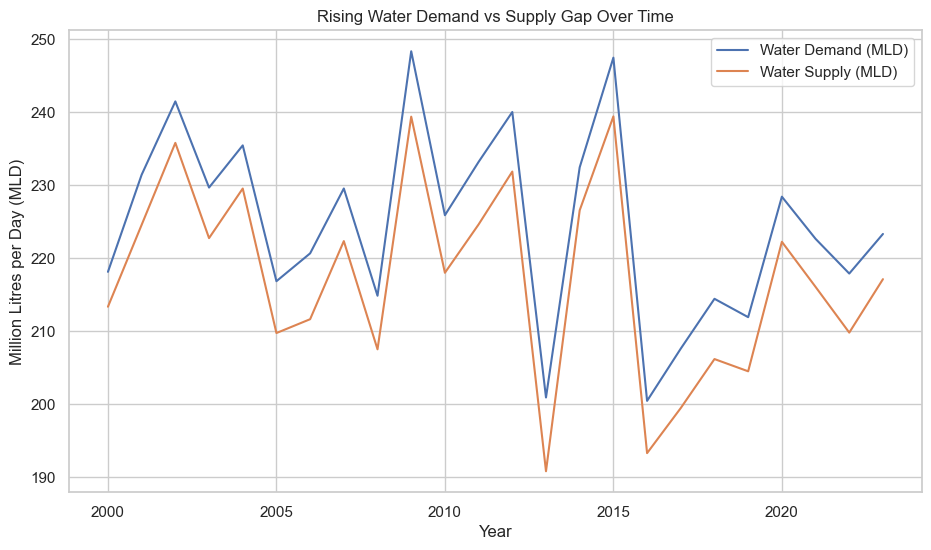

In [75]:

# Aggregate yearly data
yearly = df.groupby("year").agg({
    "water_demand_mld": "mean",
    "water_supply_mld": "mean",
    "scarcity_index": "mean"
}).reset_index()

plt.figure(figsize=(11,6))

sns.lineplot(
    data=yearly,
    x="year",
    y="water_demand_mld",
    label="Water Demand (MLD)"
)

sns.lineplot(
    data=yearly,
    x="year",
    y="water_supply_mld",
    label="Water Supply (MLD)"
)

plt.title("Rising Water Demand vs Supply Gap Over Time")
plt.ylabel("Million Litres per Day (MLD)")
plt.xlabel("Year")
plt.legend()
plt.show()


### Insights
Water demand has increased steadily over the years, while water supply has grown at a much slower pace, resulting in a widening demand–supply gap that directly contributes to rising water scarcity.

### Recommendations
Water policy should focus on demand-side management, efficiency improvements, and reuse strategies, rather than relying solely on expanding supply infrastructure.

### Overall Insights

* Water scarcity is primarily driven by demand–supply imbalance, not rainfall alone. Many regions experience high scarcity despite adequate rainfall.

* Groundwater levels show a long-term declining trend, indicating sustained over-extraction and insufficient recharge over the years.

* Groundwater extraction frequently exceeds natural recharge, leading to persistent groundwater stress in several regions.

* Population growth significantly increases water demand, intensifying scarcity in densely populated and urban regions.

* Water scarcity and groundwater stress exhibit strong regional persistence, suggesting structural issues rather than short-term or seasonal variability.

* Rainfall does not reliably translate into groundwater recovery, highlighting inefficiencies in recharge and storage mechanisms.

### Overall Recommendations

* Shift from rainfall-dependent planning to integrated water management, focusing on demand control, groundwater regulation, and supply efficiency.

* Implement region-specific groundwater extraction limits based on extraction–recharge balance and groundwater stress indicators.

* Promote large-scale recharge and conservation measures, such as rainwater harvesting, aquifer recharge, and watershed management.

* Adopt demand-side management strategies in high-population regions, including water-efficient infrastructure, reuse, and awareness programs.

* Prioritize persistently high-scarcity regions as intervention zones, allocating targeted funding and long-term sustainability programs.

* Leverage data analytics for continuous monitoring, enabling evidence-based policymaking and early identification of emerging water stress.

# Conclusion

* Water scarcity is primarily driven by demand–supply imbalance and groundwater over-extraction, rather than rainfall variability alone.

* Groundwater levels show a consistent declining trend, indicating long-term unsustainable usage across multiple regions.

* Groundwater extraction frequently exceeds natural recharge, leading to persistent groundwater stress.

* High population density significantly amplifies water demand, intensifying scarcity in urban and densely populated regions.

* Water scarcity patterns remain regionally persistent over time, highlighting structural and governance-related challenges.

* Data-driven analysis proves effective in identifying high-risk regions and supporting sustainable water resource planning.